In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_data = pd.read_csv("Occupancy_train.txt")
test_data = pd.read_csv("Occupancy_test.txt")
print("✅ Train and Test datasets loaded successfully!\n")

✅ Train and Test datasets loaded successfully!



In [4]:
print("🔹 Train data shape:", train_data.shape)
print("🔹 Test data shape:", test_data.shape)

print("\n🔹 First few rows of training data:")
display(train_data.head())

🔹 Train data shape: (8143, 7)
🔹 Test data shape: (2665, 7)

🔹 First few rows of training data:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
X_train = train_data[['Humidity', 'Light', 'HumidityRatio']]
y_train = train_data['Occupancy']

X_test = test_data[['Humidity', 'Light', 'HumidityRatio']]
y_test = test_data['Occupancy']

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")


K = 1, Accuracy = 0.9347
K = 2, Accuracy = 0.9253
K = 3, Accuracy = 0.9426
K = 4, Accuracy = 0.9343
K = 5, Accuracy = 0.9520
K = 6, Accuracy = 0.9475
K = 7, Accuracy = 0.9565
K = 8, Accuracy = 0.9538
K = 9, Accuracy = 0.9568
K = 10, Accuracy = 0.9542


In [8]:
best_k = np.argmax(accuracies) + 1
best_acc = max(accuracies)

print("\n✅ Highest Accuracy:", round(best_acc, 4))
print("✅ Best value of K:", best_k)


✅ Highest Accuracy: 0.9568
✅ Best value of K: 9


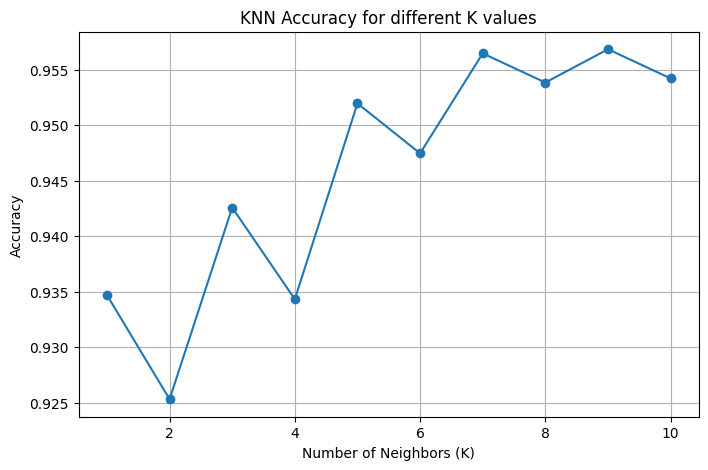

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title("KNN Accuracy for different K values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()